In [3]:
import tensorflow_datasets as tfds
import pandas
import tensorflow as tf

In [10]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 848.3 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.4/499.4 kB 3.9 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [2]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

2023-02-18 20:16:33.484100: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64
2023-02-18 20:16:33.484231: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [4]:
images = []
classes = []
for (img, cls) in train_dataset.take(10000):
    images.append(img)
    classes.append(cls)

2023-02-18 20:18:30.950887: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [9]:
images = tf.reshape(tf.stack(images), (10000, 28*28))

In [11]:
images.shape

TensorShape([10000, 784])

In [12]:
classes = tf.stack(classes)
classes.shape

TensorShape([10000])

In [17]:
images = images/255

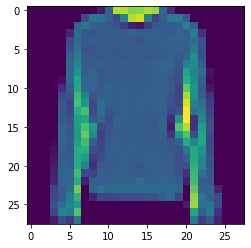

In [21]:
import matplotlib.pyplot as plt

plt.imshow(tf.reshape(images[0], (28, 28)))

In [22]:
eigen_values, eigen_vectors = tf.linalg.eigh(tf.tensordot(tf.transpose(images), images, axes=1))

In [27]:
X_new = tf.tensordot(tf.transpose(eigen_vectors), tf.transpose(images), axes=1)

X_pca = tf.transpose(X_new[:30, :])

In [29]:
X_pca.shape

TensorShape([10000, 30])

In [32]:
import pandas

df = pandas.DataFrame(X_pca, columns = ['pca' + str(i) for i in range(1, 31)])

df.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca21,pca22,pca23,pca24,pca25,pca26,pca27,pca28,pca29,pca30
0,-0.000303,-0.000002,0.000035,-0.000126,0.000407,0.000298,0.000281,0.000319,-0.000551,-0.000085,...,0.002135,-0.002224,-0.002536,-0.002565,-0.000647,-0.005527,-0.001981,-0.001300,-0.002051,0.001611
1,-0.000068,0.000021,0.000069,-0.000291,0.000239,0.000160,0.000109,0.000236,-0.000677,-0.000303,...,-0.000175,0.002438,-0.000011,-0.000506,-0.000604,0.000152,-0.001833,-0.002506,0.000073,0.002282
2,-0.000335,-0.000199,-0.000360,0.000192,0.000580,0.004561,0.002532,-0.000798,0.001306,0.000153,...,0.001952,-0.018193,0.019071,0.041150,0.002303,-0.009250,0.015746,-0.007606,0.012387,-0.026202
3,-0.000096,-0.000043,-0.000046,-0.000182,0.000505,0.000484,-0.000558,0.000035,-0.000163,0.001567,...,-0.001015,0.002394,0.000488,-0.003182,0.002165,-0.000735,0.003141,-0.003657,0.001303,0.003062
4,0.000257,0.000008,-0.000023,0.000062,-0.000180,-0.000065,-0.000697,0.000616,0.000523,0.000308,...,0.000954,-0.002263,0.000717,-0.001389,0.001549,-0.002381,0.001570,0.001293,0.000348,0.000119


In [33]:
df['class'] = classes

In [34]:
df.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca22,pca23,pca24,pca25,pca26,pca27,pca28,pca29,pca30,class
0,-0.000303,-0.000002,0.000035,-0.000126,0.000407,0.000298,0.000281,0.000319,-0.000551,-0.000085,...,-0.002224,-0.002536,-0.002565,-0.000647,-0.005527,-0.001981,-0.001300,-0.002051,0.001611,2
1,-0.000068,0.000021,0.000069,-0.000291,0.000239,0.000160,0.000109,0.000236,-0.000677,-0.000303,...,0.002438,-0.000011,-0.000506,-0.000604,0.000152,-0.001833,-0.002506,0.000073,0.002282,1
2,-0.000335,-0.000199,-0.000360,0.000192,0.000580,0.004561,0.002532,-0.000798,0.001306,0.000153,...,-0.018193,0.019071,0.041150,0.002303,-0.009250,0.015746,-0.007606,0.012387,-0.026202,8
3,-0.000096,-0.000043,-0.000046,-0.000182,0.000505,0.000484,-0.000558,0.000035,-0.000163,0.001567,...,0.002394,0.000488,-0.003182,0.002165,-0.000735,0.003141,-0.003657,0.001303,0.003062,4
4,0.000257,0.000008,-0.000023,0.000062,-0.000180,-0.000065,-0.000697,0.000616,0.000523,0.000308,...,-0.002263,0.000717,-0.001389,0.001549,-0.002381,0.001570,0.001293,0.000348,0.000119,1


In [35]:
df.to_csv("data.csv")